A.
This is a public competition from www.kaggle.com, the site offer the data about Titanic, and ask if people can predict the rate of surrive based on the given data.  

B.
PURPOSE OF THIS APPROACH : MAKE THE ACCURACY >  75%

C. 
The process of approach :  1. overall data servey  => 2. feature selection  => 3. do the Kmeans, Naive Bayes, Random Forest  learning 

In [5]:
#import the modules

import pandas as pd, numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

Populating the interactive namespace from numpy and matplotlib


In [6]:
#set up the function
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()


In [7]:
#import the train & test data 
train_df = pd.read_csv("~/Desktop/titanic_train.csv", dtype={"Age": np.float64}, )
test_df  = pd.read_csv("~/Desktop/titanic_test.csv", dtype={"Age": np.float64}, )

In [8]:
#play the train data first 
df = train_df 

/Users/GGV/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


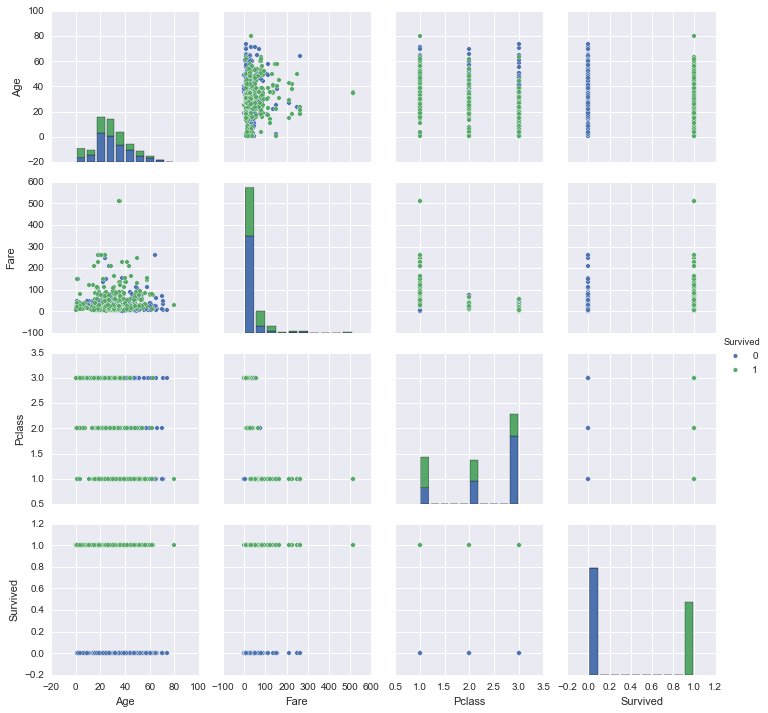

In [9]:
#do the pairplot 
data =  df[['Age', 'Fare','Pclass', 'Survived']]
data = data[data.Age >0]
data['Age'] = data['Age'].fillna(data['Age'].mean())
plt.figure()
sns.pairplot(data,hue="Survived", dropna=True)
plt.savefig("1_seaborn_pair_plot.png")


In [7]:
#from common sense & pairplot, we guess that the "Sex" , "Age", "Pclass" may be the good feature for doing the ML 

KNN - score  & confusin matrix :

Accuracy on Training Set: 0.737
[[57 20]
 [32 34]]


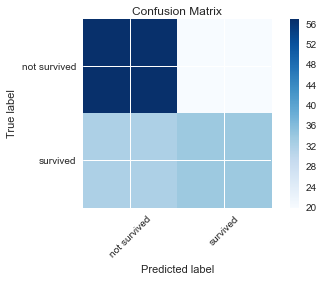

In [12]:
X = data[['Fare','Pclass', 'Age']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=33)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Accuracy on Training Set: {:.3f}'.format(knn.score(X, y)))

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plot_confusion_matrix(cm)

KNN - cross validation :

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=33)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy on Training Set: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Accuracy on Testing Set: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy on Training Set: 0.762
Accuracy on Testing Set: 0.636


KNN - check the evolution of accuracy  for different "neighbors" :

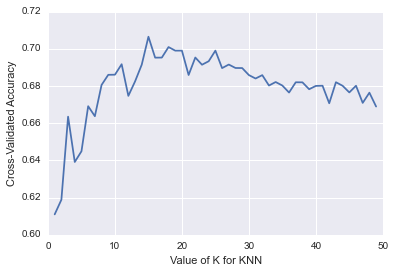

In [15]:
k_range = range(1,50)
k_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
	k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Gaussian Naive Bayes :

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
gnb = GaussianNB()
gnb.fit(X,y)
print gnb.score(X,y)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print y_pred
scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print average(scores)

0.668067226891
0.672456964006


Multinomial Naive Bayes :

In [22]:
clf = MultinomialNB()
clf.fit(X,y)
print clf.score(X,y)
#print clf.predict(X)
scores2 = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print average(scores2)

0.6918767507
0.692038341158


RandomForest :

0.945378151261


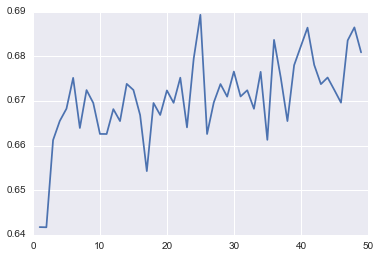

In [23]:
RDF = RF()
RDF.fit(X,y)
print RDF.score(X,y)
k_scores = []
for k in k_range:

	RDF = RF(n_estimators=k)
	#clf = clf.fit(X_train, y_train)
	#clf.predict(X_test)   
	scores = cross_val_score(RDF, X, y, cv=10, scoring='accuracy')
	k_scores.append(scores.mean())
plot(k_range, k_scores)